In [ ]:
!git clone https://github.com/rishabh-bhardwaj-64rr/EVA5.git

Cloning into 'EVA5'...
remote: Enumerating objects: 269, done.
remote: Counting objects: 100% (269/269), done.
remote: Compressing objects: 100% (246/246), done.
remote: Total 269 (delta 126), reused 44 (delta 8), pack-reused 0
Receiving objects: 100% (269/269), 1.02 MiB | 9.09 MiB/s, done.
Resolving deltas: 100% (126/126), done.


In [ ]:
cd EVA5/S8/

/content/EVA5/S8


In [ ]:
from __future__ import print_function

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary

from tqdm import tqdm 

In [ ]:

from data_loading import transform, dataset, dataloader
from models import resnet
import normalisation as norm, loss_functions, trainer, tester, run_model
from utils import plot_metrics, misclassifications, classwise_accuracy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

train_transforms, test_transforms = transform.cifar10_transforms()
trainset, testset = dataset.cifar10_dataset(train_transforms, test_transforms)
train_loader, test_loader = dataloader.cifar10_dataloader(trainset, testset)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA available? True


In [ ]:
# classes in the data
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
# device
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [ ]:
# model summary
net = resnet.ResNet18().to(device)
print(summary(net, input_size=(3, 32, 32)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [ ]:
EPOCHS = 25
optimizer = optim.SGD(net.parameters(), lr = 0.005, momentum = 0.9)

train_acc = []
train_losses = []
test_acc = []
test_losses = []

run_model.evaluation( net, train_loader, test_loader, optimizer, EPOCHS, device,
                    train_acc, train_losses, test_acc, test_losses)

  0%|          | 0/391 [00:00<?, ?it/s]


 Epoch: 1


Loss = 1.084045648574829 Batch_id = 390 Accuracy = 50.25: 100%|██████████| 391/391 [00:53<00:00,  7.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 6124/10000 (61.24%)


 Epoch: 2


Loss = 0.8488475680351257 Batch_id = 390 Accuracy = 68.84: 100%|██████████| 391/391 [00:54<00:00,  7.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 7057/10000 (70.57%)


 Epoch: 3


Loss = 0.7103789448738098 Batch_id = 390 Accuracy = 75.75: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7408/10000 (74.08%)


 Epoch: 4


Loss = 0.3309219479560852 Batch_id = 390 Accuracy = 79.82: 100%|██████████| 391/391 [00:55<00:00,  7.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 7934/10000 (79.34%)


 Epoch: 5


Loss = 0.5590019226074219 Batch_id = 390 Accuracy = 82.79: 100%|██████████| 391/391 [00:54<00:00,  7.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7773/10000 (77.73%)


 Epoch: 6


Loss = 0.2956216335296631 Batch_id = 390 Accuracy = 84.65: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8151/10000 (81.51%)


 Epoch: 7


Loss = 0.3496395945549011 Batch_id = 390 Accuracy = 86.47: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8314/10000 (83.14%)


 Epoch: 8


Loss = 0.2643565535545349 Batch_id = 390 Accuracy = 87.84: 100%|██████████| 391/391 [00:55<00:00,  7.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8337/10000 (83.37%)


 Epoch: 9


Loss = 0.23957951366901398 Batch_id = 390 Accuracy = 89.42: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8435/10000 (84.35%)


 Epoch: 10


Loss = 0.17121049761772156 Batch_id = 390 Accuracy = 90.11: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8399/10000 (83.99%)


 Epoch: 11


Loss = 0.5154976844787598 Batch_id = 390 Accuracy = 91.33: 100%|██████████| 391/391 [00:55<00:00,  7.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8530/10000 (85.30%)


 Epoch: 12


Loss = 0.2530817687511444 Batch_id = 390 Accuracy = 91.94: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8430/10000 (84.30%)


 Epoch: 13


Loss = 0.35194095969200134 Batch_id = 390 Accuracy = 92.82: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8591/10000 (85.91%)


 Epoch: 14


Loss = 0.1953088939189911 Batch_id = 390 Accuracy = 93.55: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8474/10000 (84.74%)


 Epoch: 15


Loss = 0.16365933418273926 Batch_id = 390 Accuracy = 94.08: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8446/10000 (84.46%)


 Epoch: 16


Loss = 0.21722564101219177 Batch_id = 390 Accuracy = 94.73: 100%|██████████| 391/391 [00:55<00:00,  7.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8473/10000 (84.73%)


 Epoch: 17


Loss = 0.10815157741308212 Batch_id = 390 Accuracy = 94.91: 100%|██████████| 391/391 [00:54<00:00,  7.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8470/10000 (84.70%)


 Epoch: 18


Loss = 0.20505857467651367 Batch_id = 390 Accuracy = 95.43: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8610/10000 (86.10%)


 Epoch: 19


Loss = 0.2839953899383545 Batch_id = 390 Accuracy = 95.71: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8590/10000 (85.90%)


 Epoch: 20


Loss = 0.05210573226213455 Batch_id = 390 Accuracy = 96.15: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8478/10000 (84.78%)


 Epoch: 21


Loss = 0.19230519235134125 Batch_id = 390 Accuracy = 96.44: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8609/10000 (86.09%)


 Epoch: 22


Loss = 0.08273787796497345 Batch_id = 390 Accuracy = 96.53: 100%|██████████| 391/391 [00:54<00:00,  7.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8407/10000 (84.07%)


 Epoch: 23


Loss = 0.18718305230140686 Batch_id = 390 Accuracy = 96.59: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8667/10000 (86.67%)


 Epoch: 24


Loss = 0.08969565480947495 Batch_id = 390 Accuracy = 97.07: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8736/10000 (87.36%)


 Epoch: 25


Loss = 0.0639602467417717 Batch_id = 390 Accuracy = 97.23: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]



Test set: Average loss: 0.0041, Accuracy: 8653/10000 (86.53%)



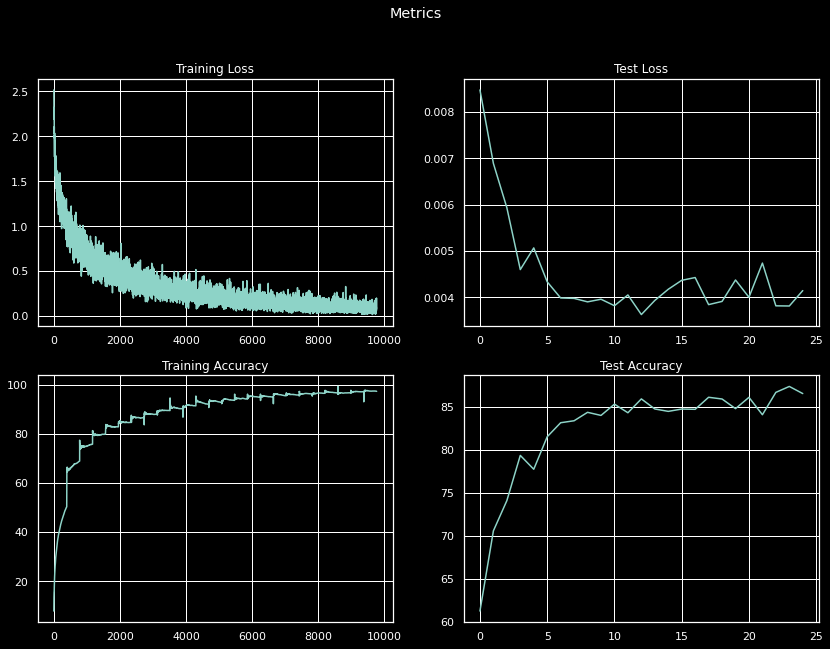

In [ ]:
train_metric = (train_acc, train_losses)
test_metric = (test_acc, test_losses)

plot_metrics.metrics(train_metric, test_metric)

In [ ]:
classwise_accuracy.classwise_accuracy(net, test_loader, device, classes)

Accuracy of plane : 92 %
Accuracy of   car : 86 %
Accuracy of  bird : 90 %
Accuracy of   cat : 60 %
Accuracy of  deer : 83 %
Accuracy of   dog : 87 %
Accuracy of  frog : 87 %
Accuracy of horse : 87 %
Accuracy of  ship : 92 %
Accuracy of truck : 96 %
